<a href="https://colab.research.google.com/github/anik31/Handwritten-digits-classification/blob/master/Handwritten_digits_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense

from keras.utils import to_categorical

from keras.preprocessing import image

In [3]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [0]:
def plot_img(img):
  plt.imshow(img.reshape(28,28), cmap='gray')

image is: 0


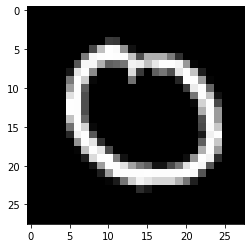

In [5]:
plot_img(x_train[108])
print('image is:',y_train[108])

###Model Building


In [6]:
x_train.shape

(60000, 28, 28)

In [0]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [0]:
model = Sequential()
model.add(Dense(units=32, activation='relu',input_shape=(784,)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 40,010
Trainable params: 40,010
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
y_train= to_categorical(y_train)
y_test= to_categorical(y_test)

In [16]:
y_train.shape

(60000, 10)

In [34]:
hist = model.fit(x=x_train,y=y_train,batch_size=32,epochs=15,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 3s 55us/step - loss: 0.0705 - accuracy: 0.9808 - val_loss: 0.1857 - val_accuracy: 0.9630
Epoch 2/15
60000/60000 [==============================] - 3s 53us/step - loss: 0.0623 - accuracy: 0.9823 - val_loss: 0.2223 - val_accuracy: 0.9659
Epoch 3/15
60000/60000 [==============================] - 3s 53us/step - loss: 0.0632 - accuracy: 0.9821 - val_loss: 0.2304 - val_accuracy: 0.9637
Epoch 4/15
60000/60000 [==============================] - 3s 53us/step - loss: 0.0557 - accuracy: 0.9833 - val_loss: 0.2193 - val_accuracy: 0.9641
Epoch 5/15
60000/60000 [==============================] - 3s 52us/step - loss: 0.0625 - accuracy: 0.9834 - val_loss: 0.2153 - val_accuracy: 0.9634
Epoch 6/15
60000/60000 [==============================] - 3s 53us/step - loss: 0.0606 - accuracy: 0.9831 - val_loss: 0.2368 - val_accuracy: 0.9629
Epoch 7/15
60000/60000 [==============================] - 3s 52us/st

In [35]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 23us/step


[0.306688052713049, 0.9620000123977661]

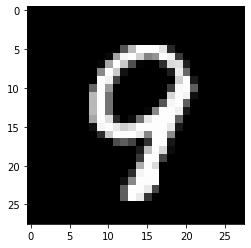

In [40]:
plot_img(x_test[5001])

In [0]:
y_pred=model.predict_classes(x_test)

In [41]:
y_pred[5001]

9

In [42]:
model.predict_classes(x_test[[5001]])

array([9])

In [45]:
imag = image.load_img('new.png',grayscale=True,target_size=(28,28))
imag= np.array(imag)
imag=imag.reshape(1,784)

prediction=model.predict_classes(imag)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [46]:
prediction

array([6])

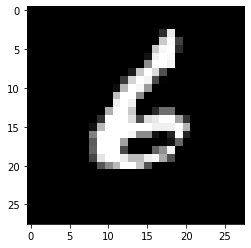

In [49]:
plot_img(imag)